# **Classroom Flu Spread Simulation**

##### **Georgia Tech - ISYE 6644 - Simulation** | **Parth Patel** | **04/23/2024**

Consider a classroom of 31 elementary school kids. 30 of the kids are healthy (and susceptible to flu) on Day 1. Tommy (the 31st kid) walks in with the flu and starts interacting with his potential victims. To keep things simple, let’s suppose that Tommy comes to school every day (whether or not he’s sick) and will be infectious for 3 days. Thus, there are 3 chances for Tommy to infect the other kids — Days 1, 2, and 3. Suppose that the probability that he infects any individual susceptible kid on any of the three days is p = 0.02; and suppose that all kids and days are independent (so that you have i.i.d. Bern(p)trials). If a kid gets infected by Tommy, he will then become infectious for 3 days as well, starting on the next day.

#### **Questions**
1. What is the distribution of the number of kids that Tommy infects on Day 1?
2. What is the expected number of kids that Tommy infects on Day 1?
3. What is the expected number of kids that are infected by Day 2 (you can count Tommy if you want)?
4. Simulate the number of kids that are infected on Days 1,2,. . . . Do this many times. What are the (estimated) expected numbers of kids that are infected by Day i, i = 1,2,...? Produce a histogram detailing how long the “epidemic” will last.
5. What if each kid has a 50–50 chance of already being immunized?

### 1. What is the distribution of the number of kids that Tommy infects on Day 1?

The distribution of the number of kids Tommy infects on Day 1 can be modeled using a binomial distribution since each interaction between Tommy and another kid is an independent and identically distributed (i.i.d.) Bernoulli trial with a success probability of p. The binomial distribution formula is

$$ Pr(X = k) = {n \choose k} p^kq^{n-k} $$

where **k** is the number of kids infected by Tommy on Day 1, **n** is the number of susceptible kids, **p** is the probability of infection in a single interaction, and **q** is simply 1 - p.


### 2. What is the expected number of kids that Tommy infects on Day 1?

The expected number of kids that Tommy infects on Day 1 can be calculated using the formula for the expected value of a binomial distribution. 
The expected value (or mean) of a binomial distribution with parameters n and p is given by
$$ E(X) = np. $$

In this case, the expected value for n = 30 and p = 0.02 is
$$ E(X) = 30 * 0.02 = 0.6. $$

This can also be shown using the binomial PMF function from the SciPy library. 

In [1]:
import scipy.stats as stats

n = 30  #number of healthy kids, so excluding Tommy
p = 0.02  #probability of infection

X = list(range(n+1))  #values of X (0 to n+1)

pmf = stats.binom.pmf(X, n, p)

for x, prob in zip(X, pmf):
    print(f'P(X = {x}) = {prob:.4f}')
    if (prob < 1/10000):
        break

print("\nExpected value given n =", n, "and p =", p, "is:", stats.binom.expect(args=(n, p)))

import plot_helper as plot
plot.prob_distr(X, pmf)

P(X = 0) = 0.5455
P(X = 1) = 0.3340
P(X = 2) = 0.0988
P(X = 3) = 0.0188
P(X = 4) = 0.0026
P(X = 5) = 0.0003
P(X = 6) = 0.0000

Expected value given n = 30 and p = 0.02 is: 0.6


Loading BokehJS ...

The expected number of kids that Tommy infects on Day 1 is 0.6. This means that, on average, we would expect Tommy to infect approximately 0 or 1 kid. 

However, when I looked at the probabilities more closely, I found that there is a higher chance that Tommy will not infect anyone. The probability of Tommy infecting no one on day 1 is 0.5455, which is higher compared to the probability of infecting 1 kid, which is 0.334. Therefore, based on these probabilities, it is more likely that Tommy will not infect anyone on day 1.

### 3. What is the expected number of kids that are infected by Day 2 (you can count Tommy if you want)?
### 4. Simulate the number of kids that are infected on Days 1,2,. . . . Do this many times. What are the (estimated) expected numbers of kids that are infected by Day i, i = 1,2,...? Produce a histogram detailing how long the “epidemic” will last.

The code cell below can be used to answer questions 3 and 4. By modifying the arguments in the `run_sim` function from the `sim_funcs.py` module, you can customize the simulation settings. You can adjust the number of kids, probability of infection, recovery days, and the number of replications.

- The default parameters are set as follows: `n_kids = 31`, `p_infection = 0.02`, `recovery_days = 3`, and `reps = 1000`. 

 - Note that longer replications may take more time to compute. Using `reps` <= 5 will provide plot of the pandemic evolution for each replication. 

 - For reporting purposes, I have set the replications to `3000` in the final report.

 - To run the simulation with the default parameters, simply execute the code cell below. For detailed findings and conclusions, please refer to the final report.

Pandemic Flu Spread Simulation | Only 1 Infected Kid on Day 1
- Number of students: 31
- Probability of infection: 2.0 %
- Recovery days before immunity: 3 

-> Running simulation with supplied reps: 3000 



Running simulation: 100%|██████████| 3000/3000 [09:12<00:00,  5.43rep/s]


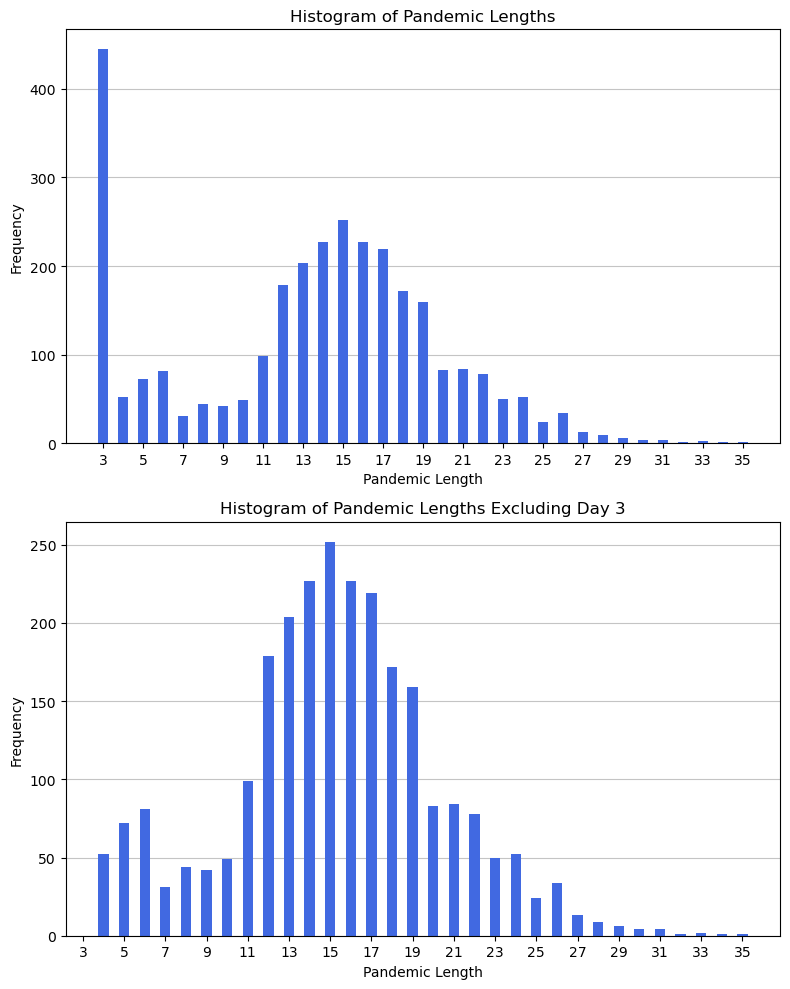

In [2]:
import pandas as pd
import sim_funcs as sim
import plot_helper as plot


                                     ### MODIFY PARAMETERS HERE ###
sim_results = sim.run_sim(n_kids = 31, p_infection = 0.02, recovery_days = 3,
                          reps = 3000, 
                          print_debug = False)


sim_combined_df = pd.DataFrame()
sim_combined_df = pd.concat(sim_results.values(), ignore_index=True)

plot.expected_num_infected_per_day(sim_combined_df)
plot.pandemic_lengths_histogram(sim_results, half_immune = False)

#### 5. What if each kid has a 50–50 chance of already being immunized?


The code cell below can be used to answer question 5. It utilizes the `run_sim_half_immune` function from the `sim_funcs.py` module which is very similar to the `run_sim` function above. The key difference here is that in this simulation, each kid has a 50-50 chance of already being immunized on day 1. Therefore, we would expect that the pandemic lasts for a shorter duration during each replication and so less kids should be infected overall. 

 - The default parameters are set as follows: `n_kids = 31`, `p_infection = 0.02`, `recovery_days = 3`, and `reps = 1000`. 

 - Note that longer replications may take more time to compute. Using `reps` <= 5 will provide plot of the pandemic evolution for each replication. 

 - For reporting purposes, I have again set the replications to `3000` in the final report.

 - To run the simulation with the default parameters, simply execute the code cells below. For detailed findings and conclusions, please refer to the final report.

Pandemic Flu Spread Simulation | 50-50 chance of already being immune
- Number of students: 31
- Probability of infection: 2.0 %
- Recovery days before immunity: 3 

-> Running simulation with supplied reps: 3000 



Running simulation: 100%|██████████| 3000/3000 [01:26<00:00, 34.87rep/s]


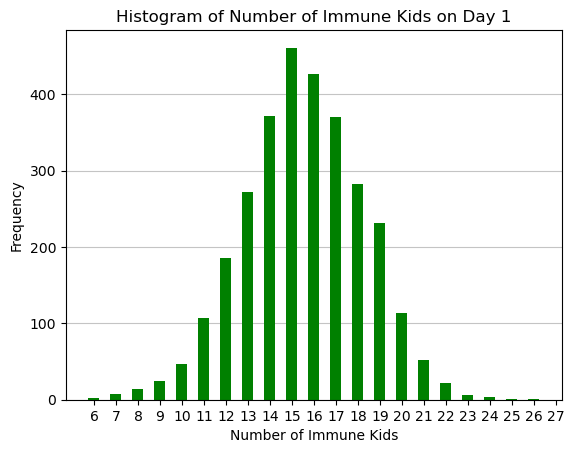

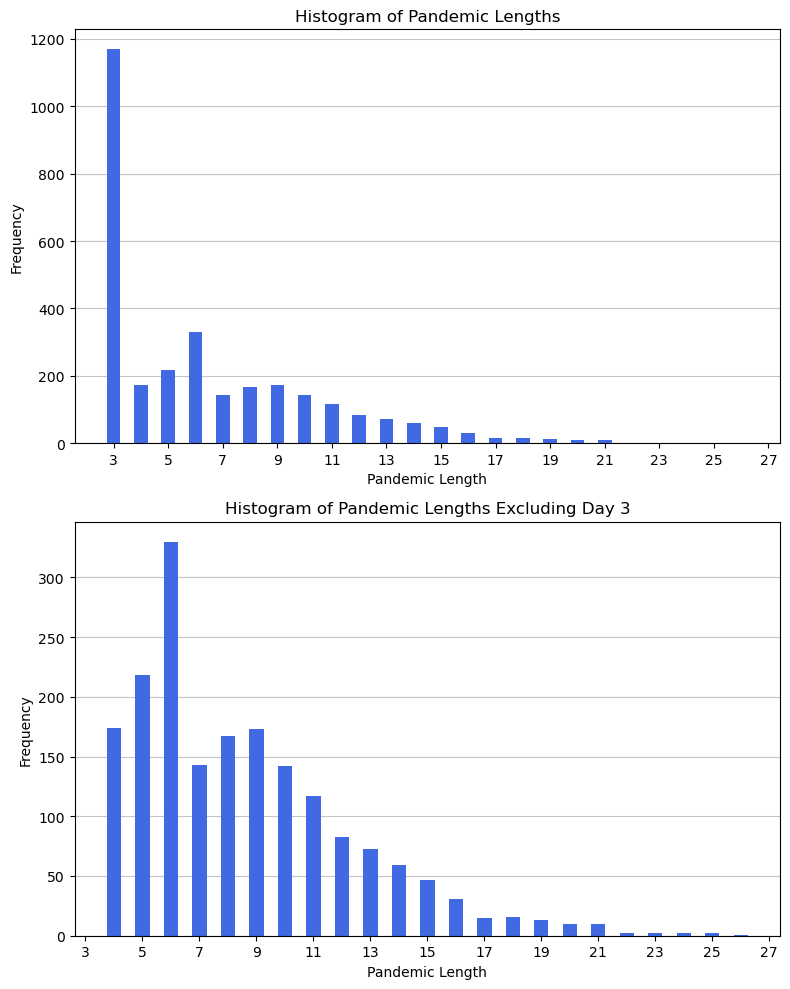

In [3]:
                                                           ### MODIFY PARAMETERS HERE ###
sim_half_immune_results = sim.run_sim_half_immune(n_kids = 31, p_infection = 0.02, recovery_days = 3,
                                                  reps = 3000, 
                                                  print_debug = False)


num_immune_day1 = []

for run_id, dataframe in sim_half_immune_results.items():
    num_immune = dataframe.loc[1, "Num_Immune"]
    num_immune_day1.append(num_immune)

plot.num_immune_histogram(num_immune_day1)

sim_half_immune_combined_df = pd.DataFrame()
sim_half_immune_combined_df = pd.concat(sim_half_immune_results.values(), ignore_index=True)

plot.expected_num_infected_per_day(sim_half_immune_combined_df)
plot.pandemic_lengths_histogram(sim_half_immune_results, half_immune = True)